In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn.linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import sklearn.ensemble
import numpy as np
from fbprophet import Prophet
import seaborn; seaborn.set()

In [3]:
df = pd.read_csv('beijing3.csv', index_col=0)

In [4]:
df.isnull().sum()

year          0
month         0
day           0
hour          0
pm2.5         0
DEWP          0
TEMP          0
PRES          0
cbwd          0
Iws           0
Is            0
Ir            0
cars          0
average_pm    0
dtype: int64

In [5]:
df.shape

(41756, 14)

In [6]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])


In [7]:
columns = ['date', 'year', 'month', 'pm2.5', 'DEWP', 'TEMP', 'PRES', 'cbwd', 'Iws', 'Is', 'Ir', 'cars']
# , 'cars', 'average_pm'

In [8]:
df[columns].head()
df[columns].dtypes

date     datetime64[ns]
year              int64
month             int64
pm2.5           float64
DEWP              int64
TEMP            float64
PRES            float64
cbwd             object
Iws             float64
Is                int64
Ir                int64
cars            float64
dtype: object

In [9]:
df = df[columns]

In [10]:
x = df.year
y = df['pm2.5']

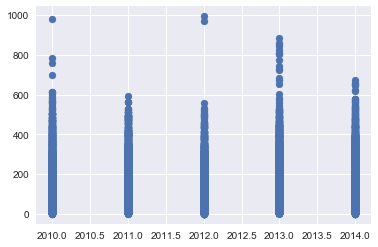

In [11]:
plt.scatter(x,y)

In [12]:
df.corr()

,year,month,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cars
year,1.000000,-0.002507,-0.014679,0.007256,0.055612,-0.013455,-0.068295,-0.019552,-0.026303,0.999177
month,-0.002507,1.000000,-0.024057,0.234456,0.172093,-0.066306,0.014647,-0.062888,0.038870,-0.002394
pm2.5,-0.014679,-0.024057,1.000000,0.171436,-0.090525,-0.047285,-0.247782,0.019266,-0.051368,-0.013199
DEWP,0.007256,0.234456,0.171436,1.000000,0.823814,-0.777727,-0.293125,-0.034928,0.125339,0.007056
TEMP,0.055612,0.172093,-0.090525,0.823814,1.000000,-0.826911,-0.149630,-0.094789,0.049541,0.056055
PRES,-0.013455,-0.066306,-0.047285,-0.777727,-0.826911,1.000000,0.178876,0.070538,-0.080531,-0.013022
Iws,-0.068295,0.014647,-0.247782,-0.293125,-0.149630,0.178876,1.000000,0.022630,-0.009158,-0.068216
Is,-0.019552,-0.062888,0.019266,-0.034928,-0.094789,0.070538,0.022630,1.000000,-0.009764,-0.019819
Ir,-0.026303,0.038870,-0.051368,0.125339,0.049541,-0.080531,-0.009158,-0.009764,1.000000,-0.026746
cars,0.999177,-0.002394,-0.013199,0.007056,0.056055,-0.013022,-0.068216,-0.019819,-0.026746,1.000000


In [13]:
df2 = df[['date', 'Iws']]
df2.head()

,date,Iws
25,2010-01-02,2.68
26,2010-01-02,3.57
27,2010-01-02,5.36
28,2010-01-02,6.25
29,2010-01-02,7.14


In [14]:
df1 = df.rename(columns={'pm2.5': 'y', 'date': 'ds'})

In [15]:
columns = ['ds', 'y']

In [16]:
df1 = df1[columns]

In [17]:
df1.head()

,ds,y
25,2010-01-02,148.0
26,2010-01-02,159.0
27,2010-01-02,181.0
28,2010-01-02,138.0
29,2010-01-02,109.0


In [18]:
df.head()

,date,year,month,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,cars
25,2010-01-02,2010,1,148.0,-15,-4.0,1020.0,SE,2.68,0,0,4000000.0
26,2010-01-02,2010,1,159.0,-11,-5.0,1021.0,SE,3.57,0,0,4000000.0
27,2010-01-02,2010,1,181.0,-7,-5.0,1022.0,SE,5.36,1,0,4000000.0
28,2010-01-02,2010,1,138.0,-7,-5.0,1022.0,SE,6.25,2,0,4000000.0
29,2010-01-02,2010,1,109.0,-7,-6.0,1022.0,SE,7.14,3,0,4000000.0


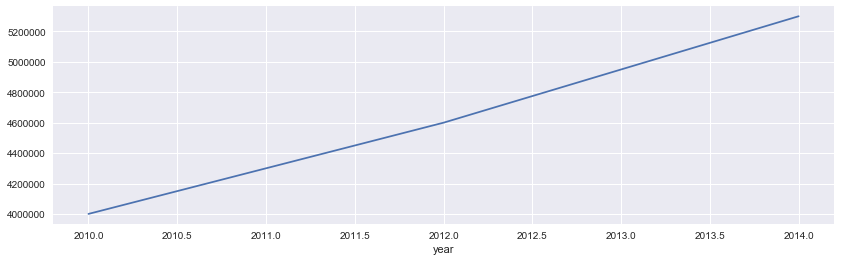

In [19]:
mean_cars = df.groupby('year')['cars'].mean()
mean_cars.plot(kind='line',figsize=(14,4))

In [20]:
#months = list(mean_pm)

In [21]:
#mean_pm.plot(kind='bar',figsize=(14,4))
#plt.ylabel('Iws');

In [22]:
df['cbwd'].unique()

array(['SE', 'cv', 'NW', 'NE'], dtype=object)

In [26]:
#df['cbwd']

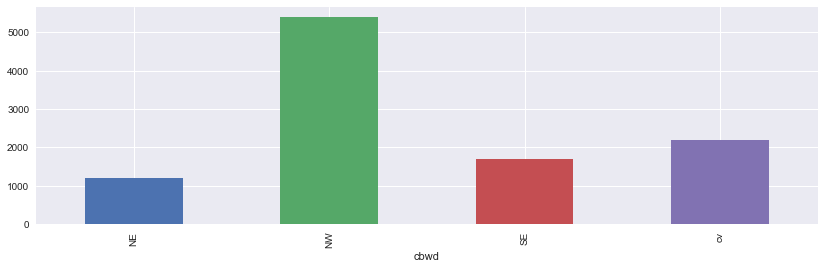

In [27]:

direction = df1.groupby(['cbwd'])['Iws'].count()

direction.plot(kind='bar', figsize=(14,4))

In [28]:
df1 = df[df['cbwd'] == 'NW']
df1 = df[(df['month'] == 1) | (df['month'] == 11) | (df['month'] == 12)]

In [29]:
df1.shape

(10512, 12)

In [30]:
df1.corr()

,year,month,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir,cars
year,1.000000,-0.023082,0.031038,-0.022273,0.138048,0.019227,-0.056218,-0.037644,-0.007886,0.999202
month,-0.023082,1.000000,-0.056373,0.291168,0.402791,-0.288861,0.054137,-0.066223,0.035579,-0.022754
pm2.5,0.031038,-0.056373,1.000000,0.493545,-0.062040,-0.255342,-0.328680,0.047555,-0.034638,0.030751
DEWP,-0.022273,0.291168,0.493545,1.000000,0.467620,-0.425274,-0.326539,0.072554,0.117954,-0.024226
TEMP,0.138048,0.402791,-0.062040,0.467620,1.000000,-0.476409,-0.042906,-0.063024,0.050308,0.140710
PRES,0.019227,-0.288861,-0.255342,-0.425274,-0.476409,1.000000,0.166615,0.013021,-0.108745,0.013822
Iws,-0.056218,0.054137,-0.328680,-0.326539,-0.042906,0.166615,1.000000,0.007520,0.047606,-0.055253
Is,-0.037644,-0.066223,0.047555,0.072554,-0.063024,0.013021,0.007520,1.000000,-0.006198,-0.039467
Ir,-0.007886,0.035579,-0.034638,0.117954,0.050308,-0.108745,0.047606,-0.006198,1.000000,-0.011362
cars,0.999202,-0.022754,0.030751,-0.024226,0.140710,0.013822,-0.055253,-0.039467,-0.011362,1.000000


In [31]:
df1.groupby('month')['cbwd'].count()

month
1     3470
11    3501
12    3541
Name: cbwd, dtype: int64

NameError: name 'T' is not defined

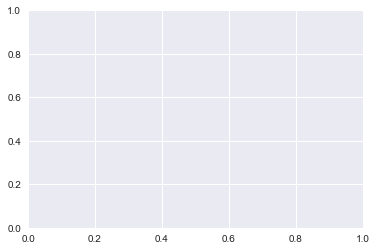

In [33]:
from scipy.interpolate import spline
import matplotlib.pyplot as plt

fig, axs = plt.subplots()
xnew = np.linspace(T.min(),T.max(),300) #300 represents number of points to make between T.min and T.max

power_smooth = spline(T,power,xnew)



plt.plot(xnew,power_smooth)
plt.rc('grid', linestyle="-", color='e9e9e9')
#fig = matplotlib.pyplot.gcf()
fig.set_size_inches(14, 4)
axs.set_xlabel('Year', fontsize=14)
axs.set_ylabel('PM2.5', fontsize=14)
axs.set_facecolor('white')
plt.grid(True)
plt.xticks(np.arange(min(T), max(T)+1, 1.0), fontsize=13, color='black')
plt.yticks(fontsize=13, color='red', weight='bold')
plt.show()

In [34]:
T = np.array(range(1,13))

power = np.array(months)


NameError: name 'months' is not defined

In [35]:
feature_columns = ['day','hour','DEWP', 'TEMP','PRES','Iws','Is', 'average_pm']
X = df[feature_columns]

KeyError: "['day' 'hour' 'average_pm'] not in index"

In [36]:
y = df['pm2.5']

In [37]:
import sklearn.model_selection
import sklearn.metrics
(Xtrain, Xtest, Ytrain, Ytest) = sklearn.model_selection.train_test_split(X,y, test_size=5)

NameError: name 'X' is not defined

In [38]:
lr = sklearn.linear_model.LinearRegression()
lr.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, lr.predict(Xtest))

NameError: name 'Xtrain' is not defined

In [39]:
sklearn.metrics.median_absolute_error(Ytest, lr.predict(Xtest))

NameError: name 'Ytest' is not defined

In [40]:
matplotlib.pyplot.scatter(Ytest, lr.predict(Xtest))

NameError: name 'matplotlib' is not defined

In [41]:
elastic = sklearn.linear_model.ElasticNetCV()
elastic.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, elastic.predict(Xtest))

NameError: name 'Xtrain' is not defined

In [42]:
sklearn.metrics.median_absolute_error(Ytest, elastic.predict(Xtest))

NameError: name 'Ytest' is not defined

In [ ]:
matplotlib.pyplot.scatter(Ytest, elastic.predict(Xtest))

In [ ]:
import sklearn.tree
tree = sklearn.tree.DecisionTreeRegressor()
tree.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, tree.predict(Xtest))

In [ ]:
sklearn.metrics.median_absolute_error(Ytest, tree.predict(Xtest))

In [ ]:
ts = sklearn.linear_model.TheilSenRegressor()
ts.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, ts.predict(Xtest))

In [ ]:
sklearn.metrics.median_absolute_error(Ytest, ts.predict(Xtest))

In [ ]:
ransac = sklearn.linear_model.RANSACRegressor()
ransac.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, ransac.predict(Xtest))

In [ ]:
sklearn.metrics.median_absolute_error(Ytest, ransac.predict(Xtest))

In [ ]:

matplotlib.pyplot.scatter(Ytest, ransac.predict(Xtest))

In [ ]:
huber = sklearn.linear_model.HuberRegressor()
huber.fit(Xtrain, Ytrain)
sklearn.metrics.r2_score(Ytest, huber.predict(Xtest))

In [ ]:
sklearn.metrics.median_absolute_error(Ytest, huber.predict(Xtest))

In [ ]:
df.head(10)

In [ ]:
Xnew = [[2,3,-7,-5,1022,5.36,1,170.0]]

In [ ]:
huber.predict(Xnew)

In [ ]:
x = df1['ds']
y = df1['y']
df.isnull().sum()
df.shape


In [ ]:
dates = x

matplotlib.pyplot.plot_date(dates, y)


In [ ]:
df2=df1.set_index(['ds'])

In [ ]:
df2.head()

In [ ]:
df2.y.describe()

In [ ]:
#fig, axs = plot.subplots()
df2.plot(figsize=(14,6))
plt.ylabel('y');

In [ ]:
weekly = df2.resample('W').mean()
weekly.plot(figsize=(14,4))

plt.ylabel('y');

In [ ]:
weekly.rolling(7, center=True, win_type='gaussian').sum(std=5).plot(style=['-', '--', '-'],figsize=(14,4));
